# Basic word embedding example with term-term matrix

## Create the text corpus from a Wikipedia article on NLP
https://en.wikipedia.org/wiki/Natural_language_processing

In [1]:
import string

import gensim
from gensim.matutils import corpus2csc
from gensim.corpora import Dictionary

import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

text = """
Natural language processing has its roots in the 1950s. Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, a task that involves the automated interpretation and generation of natural language, but at the time not articulated as a problem separate from artificial intelligence.

Symbolic NLP (1950s - early 1990s)
The premise of symbolic NLP is well-summbut they have been less frequently addressedarized by John Searle's Chinese room experiment: Given a collection of rules (e.g., a Chinese phrasebook, with questions and matching answers), the computer emulates natural language understanding (or other NLP tasks) by applying those rules to the data it is confronted with.

1950s: The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or five years, machine translation would be a solved problem.[2] However, real progress was much slower, and after the ALPAC report in 1966, which found that ten-year-long research had failed to fulfill the expectations, funding for machine translation was dramatically reduced. Little further research in machine translation was conducted until the late 1980s when the first statistical machine translation systems were developed.
1960s: Some notably successful natural language processing systems developed in the 1960s were SHRDLU, a natural language system working in restricted "blocks worlds" with restricted vocabularies, and ELIZA, a simulation of a Rogerian psychotherapist, written by Joseph Weizenbaum between 1964 and 1966. Using almost no information about human thought or emotion, ELIZA sometimes provided a startlingly human-like interaction. When the "patient" exceeded the very small knowledge base, ELIZA might provide a generic response, for example, responding to "My head hurts" with "Why do you say your head hurts?".
1970s: During the 1970s, many programmers began to write "conceptual ontologies", which structured real-world information into computer-understandable data. Examples are MARGIE (Schank, 1975), SAM (Cullingford, 1978), PAM (Wilensky, 1978), TaleSpin (Meehan, 1976), QUALM (Lehnert, 1977), Politics (Carbonell, 1979), and Plot Units (Lehnert 1981). During this time, the first many chatterbots were written (e.g., PARRY).
1980s: The 1980s and early 1990s mark the hey-day of symbolic methods in NLP. Focus areas of the time included research on rule-based parsing (e.g., the development of HPSG as a computational operationalization of generative grammar), morphology (e.g., two-level morphology[3]), semantics (e.g., Lesk algorithm), reference (e.g., within Centering Theory[4]) and other areas of natural language understanding (e.g., in the Rhetorical Structure Theory). Other lines of research were continued, e.g., the development of chatterbots with Racter and Jabberwacky. An important development (that eventually led to the statistical turn in the 1990s) was the rising importance of quantitative evaluation in this period.[5]
Statistical NLP (1990s - 2010s)
Up to the 1980s, most natural language processing systems were based on complex sets of hand-written rules. Starting in the late 1980s, however, there was a revolution in natural language processing with the introduction of machine learning algorithms for language processing. This was due to both the steady increase in computational power (see Moore's law) and the gradual lessening of the dominance of Chomskyan theories of linguistics (e.g. transformational grammar), whose theoretical underpinnings discouraged the sort of corpus linguistics that underlies the machine-learning approach to language processing.[6]

1990s: Many of the notable early successes on statistical methods in NLP occurred in the field of machine translation, due especially to work at IBM Research. These systems were able to take advantage of existing multilingual textual corpora that had been produced by the Parliament of Canada and the European Union as a result of laws calling for the translation of all governmental proceedings into all official languages of the corresponding systems of government. However, most other systems depended on corpora specifically developed for the tasks implemented by these systems, which was (and often continues to be) a major limitation in the success of these systems. As a result, a great deal of research has gone into methods of more effectively learning from limited amounts of data.
2000s: With the growth of the web, increasing amounts of raw (unannotated) language data has become available since the mid-1990s. Research has thus increasingly focused on unsupervised and semi-supervised learning algorithms. Such algorithms can learn from data that has not been hand-annotated with the desired answers or using a combination of annotated and non-annotated data. Generally, this task is much more difficult than supervised learning, and typically produces less accurate results for a given amount of input data. However, there is an enormous amount of non-annotated data available (including, among other things, the entire content of the World Wide Web), which can often make up for the inferior results if the algorithm used has a low enough time complexity to be practical.
Neural NLP (present)
In the 2010s, representation learning and deep neural network-style machine learning methods became widespread in natural language processing, due in part to a flurry of results showing that such techniques[7][8] can achieve state-of-the-art results in many natural language tasks, for example in language modeling,[9] parsing,[10][11] and many others.

Methods: Rules, statistics, neural networks
In the early days, many language-processing systems were designed by symbolic methods, i.e., the hand-coding of a set of rules, coupled with a dictionary lookup:[12][13] such as by writing grammars or devising heuristic rules for stemming.

More recent systems based on machine-learning algorithms have many advantages over hand-produced rules:

The learning procedures used during machine learning automatically focus on the most common cases, whereas when writing rules by hand it is often not at all obvious where the effort should be directed.
Automatic learning procedures can make use of statistical inference algorithms to produce models that are robust to unfamiliar input (e.g. containing words or structures that have not been seen before) and to erroneous input (e.g. with misspelled words or words accidentally omitted). Generally, handling such input gracefully with handwritten rules, or, more generally, creating systems of handwritten rules that make soft decisions, is extremely difficult, error-prone and time-consuming.
Systems based on automatically learning the rules can be made more accurate simply by supplying more input data. However, systems based on handwritten rules can only be made more accurate by increasing the complexity of the rules, which is a much more difficult task. In particular, there is a limit to the complexity of systems based on handwritten rules, beyond which the systems become more and more unmanageable. However, creating more data to input to machine-learning systems simply requires a corresponding increase in the number of man-hours worked, generally without significant increases in the complexity of the annotation process.
Despite the popularity of machine learning in NLP research, symbolic methods are still (2020) commonly used

when the amount of training data is insufficient to successfully apply machine learning methods, e.g., for the machine translation of low-resource languages such as provided by the Apertium system,
for preprocessing in NLP pipelines, e.g., tokenization, or
for postprocessing and transforming the output of NLP pipelines, e.g., for knowledge extraction from syntactic parses.
Statistical methods
Since the so-called "statistical revolution"[14][15] in the late 1980s and mid-1990s, much natural language processing research has relied heavily on machine learning. The machine-learning paradigm calls instead for using statistical inference to automatically learn such rules through the analysis of large corpora (the plural form of corpus, is a set of documents, possibly with human or computer annotations) of typical real-world examples.

Many different classes of machine-learning algorithms have been applied to natural-language-processing tasks. These algorithms take as input a large set of "features" that are generated from the input data. Increasingly, however, research has focused on statistical models, which make soft, probabilistic decisions based on attaching real-valued weights to each input feature. Such models have the advantage that they can express the relative certainty of many different possible answers rather than only one, producing more reliable results when such a model is included as a component of a larger system.

Some of the earliest-used machine learning algorithms, such as decision trees, produced systems of hard if-then rules similar to existing hand-written rules. However, part-of-speech tagging introduced the use of hidden Markov models to natural language processing, and increasingly, research has focused on statistical models, which make soft, probabilistic decisions based on attaching real-valued weights to the features making up the input data. The cache language models upon which many speech recognition systems now rely are examples of such statistical models. Such models are generally more robust when given unfamiliar input, especially input that contains errors (as is very common for real-world data), and produce more reliable results when integrated into a larger system comprising multiple subtasks.

Since the neural turn, statistical methods in NLP research have been largely replaced by neural networks. However, they continue to be relevant for contexts in which statistical interpretability and transparency is required.

Neural networks
Further information: Artificial neural network
A major drawback of statistical methods is that they require elaborate feature engineering. Since the early 2010s,[16] the field has thus largely abandoned statistical methods and shifted to neural networks for machine learning. Popular techniques include the use of word embeddings to capture semantic properties of words, and an increase in end-to-end learning of a higher-level task (e.g., question answering) instead of relying on a pipeline of separate intermediate tasks (e.g., part-of-speech tagging and dependency parsing). In some areas, this shift has entailed substantial changes in how NLP systems are designed, such that deep neural network-based approaches may be viewed as a new paradigm distinct from statistical natural language processing. For instance, the term neural machine translation (NMT) emphasizes the fact that deep learning-based approaches to machine translation directly learn sequence-to-sequence transformations, obviating the need for intermediate steps such as word alignment and language modeling that was used in statistical machine translation (SMT). Latest works tend to use non-technical structure of a given task to build proper neural network.[17]

Common NLP Tasks
The following is a list of some of the most commonly researched tasks in natural language processing. Some of these tasks have direct real-world applications, while others more commonly serve as subtasks that are used to aid in solving larger tasks.

Though natural language processing tasks are closely intertwined, they can be subdivided into categories for convenience. A coarse division is given below.

Text and speech processing
Optical character recognition (OCR)
Given an image representing printed text, determine the corresponding text.
Speech recognition
Given a sound clip of a person or people speaking, determine the textual representation of the speech. This is the opposite of text to speech and is one of the extremely difficult problems colloquially termed "AI-complete" (see above). In natural speech there are hardly any pauses between successive words, and thus speech segmentation is a necessary subtask of speech recognition (see below). In most spoken languages, the sounds representing successive letters blend into each other in a process termed coarticulation, so the conversion of the analog signal to discrete characters can be a very difficult process. Also, given that words in the same language are spoken by people with different accents, the speech recognition software must be able to recognize the wide variety of input as being identical to each other in terms of its textual equivalent.
Speech segmentation
Given a sound clip of a person or people speaking, separate it into words. A subtask of speech recognition and typically grouped with it.
Text-to-speech
Given a text, transform those units and produce a spoken representation. Text-to-speech can be used to aid the visually impaired.[18]
Word segmentation (Tokenization)
Separate a chunk of continuous text into separate words. For a language like English, this is fairly trivial, since words are usually separated by spaces. However, some written languages like Chinese, Japanese and Thai do not mark word boundaries in such a fashion, and in those languages text segmentation is a significant task requiring knowledge of the vocabulary and morphology of words in the language. Sometimes this process is also used in cases like bag of words (BOW) creation in data mining.
Morphological analysis
Lemmatization
The task of removing inflectional endings only and to return the base dictionary form of a word which is also known as a lemma. Lemmatization is another technique for reducing words to their normalized form. But in this case, the transformation actually uses a dictionary to map words to their actual form.[19]
Morphological segmentation
Separate words into individual morphemes and identify the class of the morphemes. The difficulty of this task depends greatly on the complexity of the morphology (i.e., the structure of words) of the language being considered. English has fairly simple morphology, especially inflectional morphology, and thus it is often possible to ignore this task entirely and simply model all possible forms of a word (e.g., "open, opens, opened, opening") as separate words. In languages such as Turkish or Meitei,[20] a highly agglutinated Indian language, however, such an approach is not possible, as each dictionary entry has thousands of possible word forms.
Part-of-speech tagging
Given a sentence, determine the part of speech (POS) for each word. Many words, especially common ones, can serve as multiple parts of speech. For example, "book" can be a noun ("the book on the table") or verb ("to book a flight"); "set" can be a noun, verb or adjective; and "out" can be any of at least five different parts of speech.
Stemming
The process of reducing inflected (or sometimes derived) words to a base form (e.g., "close" will be the root for "closed", "closing", "close", "closer" etc.). Stemming yields similar results as lemmatization, but does so on grounds of rules, not a dictionary.
Syntactic analysis
Grammar induction[21]
Generate a formal grammar that describes a language's syntax.
Sentence breaking (also known as "sentence boundary disambiguation")
Given a chunk of text, find the sentence boundaries. Sentence boundaries are often marked by periods or other punctuation marks, but these same characters can serve other purposes (e.g., marking abbreviations).
Parsing
Determine the parse tree (grammatical analysis) of a given sentence. The grammar for natural languages is ambiguous and typical sentences have multiple possible analyses: perhaps surprisingly, for a typical sentence there may be thousands of potential parses (most of which will seem completely nonsensical to a human). There are two primary types of parsing: dependency parsing and constituency parsing. Dependency parsing focuses on the relationships between words in a sentence (marking things like primary objects and predicates), whereas constituency parsing focuses on building out the parse tree using a probabilistic context-free grammar (PCFG) (see also stochastic grammar).
Lexical semantics (of individual words in context)
Lexical semantics
What is the computational meaning of individual words in context?
Distributional semantics
How can we learn semantic representations from data?
Named entity recognition (NER)
Given a stream of text, determine which items in the text map to proper names, such as people or places, and what the type of each such name is (e.g. person, location, organization). Although capitalization can aid in recognizing named entities in languages such as English, this information cannot aid in determining the type of named entity, and in any case, is often inaccurate or insufficient. For example, the first letter of a sentence is also capitalized, and named entities often span several words, only some of which are capitalized. Furthermore, many other languages in non-Western scripts (e.g. Chinese or Arabic) do not have any capitalization at all, and even languages with capitalization may not consistently use it to distinguish names. For example, German capitalizes all nouns, regardless of whether they are names, and French and Spanish do not capitalize names that serve as adjectives.
Sentiment analysis (see also multimodal sentiment analysis)
Extract subjective information usually from a set of documents, often using online reviews to determine "polarity" about specific objects. It is especially useful for identifying trends of public opinion in social media, for marketing.
Terminology extraction
The goal of terminology extraction is to automatically extract relevant terms from a given corpus.
Word sense disambiguation
Many words have more than one meaning; we have to select the meaning which makes the most sense in context. For this problem, we are typically given a list of words and associated word senses, e.g. from a dictionary or an online resource such as WordNet.
Relational semantics (semantics of individual sentences)
Relationship extraction
Given a chunk of text, identify the relationships among named entities (e.g. who is married to whom).
Semantic Parsing
Given a piece of text (typically a sentence), produce a formal representation of its semantics, either as a graph (e.g., in AMR parsing) or in accordance with a logical formalism (e.g., in DRT parsing). This challenge typically includes aspects of several more elementary NLP tasks from semantics (e.g., semantic role labelling, word sense disambiguation) and can be extended to include full-fledged discourse analysis (e.g., discourse analysis, coreference; see Natural Language Understanding below).
Semantic Role Labelling (see also implicit semantic role labelling below)
Given a single sentence, identify and disambiguate semantic predicates (e.g., verbal frames), then identify and classify the frame elements (semantic roles).
Discourse (semantics beyond individual sentences)
Coreference resolution
Given a sentence or larger chunk of text, determine which words ("mentions") refer to the same objects ("entities"). Anaphora resolution is a specific example of this task, and is specifically concerned with matching up pronouns with the nouns or names to which they refer. The more general task of coreference resolution also includes identifying so-called "bridging relationships" involving referring expressions. For example, in a sentence such as "He entered John's house through the front door", "the front door" is a referring expression and the bridging relationship to be identified is the fact that the door being referred to is the front door of John's house (rather than of some other structure that might also be referred to).
Discourse analysis
This rubric includes several related tasks. One task is discourse parsing, i.e., identifying the discourse structure of a connected text, i.e. the nature of the discourse relationships between sentences (e.g. elaboration, explanation, contrast). Another possible task is recognizing and classifying the speech acts in a chunk of text (e.g. yes-no question, content question, statement, assertion, etc.).
Implicit Semantic Role Labelling
Given a single sentence, identify and disambiguate semantic predicates (e.g., verbal frames) and their explicit semantic roles in the current sentence (see Semantic Role Labelling above). Then, identify semantic roles that are not explicitly realized in the current sentence, classify them into arguments that are explicitly realized elsewhere in the text and those that are not specified, and resolve the former against the local text. A closely related task is zero anaphora resolution, i.e., the extension of coreference resolution to pro-drop languages.
Recognizing Textual entailment
Given two text fragments, determine if one being true entails the other, entails the other's negation, or allows the other to be either true or false.[22]
Topic segmentation and recognition
Given a chunk of text, separate it into segments each of which is devoted to a topic, and identify the topic of the segment.
Argument mining
The goal of argument mining is the automatic extraction and identification of argumentative structures from natural language text with the aid of computer programs. [23] Such argumentative structures include the premise, conclusions, the argument scheme and the relationship between the main and subsidiary argument, or the main and counter-argument within discourse. [24][25]
Higher-level NLP applications
Automatic summarization (text summarization)
Produce a readable summary of a chunk of text. Often used to provide summaries of the text of a known type, such as research papers, articles in the financial section of a newspaper.
Book generation
Not an NLP task proper but an extension of Natural Language Generation and other NLP tasks is the creation of full-fledged books. The first machine-generated book was created by a rule-based system in 1984 (Racter, The policeman's beard is half-constructed).[26] The first published work by a neural network was published in 2018, 1 the Road, marketed as a novel, contains sixty million words. Both these systems are basically elaborate but non-sensical (semantics-free) language models. The first machine-generated science book was published in 2019 (Beta Writer, Lithium-Ion Batteries, Springer, Cham).[27] Unlike Racter and 1 the Road, this is grounded on factual knowledge and based on text summarization.
Dialogue management
Computer systems intended to converse with a human.
Document AI
A Document AI platform sits on top of the NLP technology enabling users with no prior experience of artificial intelligence, machine learning or NLP to quickly train a computer to extract the specific data they need from different document types. NLP-powered Document AI enables non-technical teams to quickly access information hidden in documents, for example, lawyers, business analysts and accountants.[28]
Grammatical error correction
Grammatical error detection and correction involves a great band-width of problems on all levels of linguistic analysis (phonology/orthography, morphology, syntax, semantics, pragmatics). Grammatical error correction is impactful since it affects hundreds of millions of people that use or acquire English as a second language. It has thus been subject to a number of shared tasks since 2011.[29][30][31] As far as orthography, morphology, syntax and certain aspects of semantics are concerned, and due to the development of powerful neural language models such as GPT-2, this can now (2019) be considered a largely solved problem and is being marketed in various commercial applications.[32]
Machine translation
Automatically translate text from one human language to another. This is one of the most difficult problems, and is a member of a class of problems colloquially termed "AI-complete", i.e. requiring all of the different types of knowledge that humans possess (grammar, semantics, facts about the real world, etc.) to solve properly.
Natural language generation (NLG):
Convert information from computer databases or semantic intents into readable human language.
Natural language understanding (NLU)
Convert chunks of text into more formal representations such as first-order logic structures that are easier for computer programs to manipulate. Natural language understanding involves the identification of the intended semantic from the multiple possible semantics which can be derived from a natural language expression which usually takes the form of organized notations of natural language concepts. Introduction and creation of language metamodel and ontology are efficient however empirical solutions. An explicit formalization of natural language semantics without confusions with implicit assumptions such as closed-world assumption (CWA) vs. open-world assumption, or subjective Yes/No vs. objective True/False is expected for the construction of a basis of semantics formalization.[33]
Question answering
Given a human-language question, determine its answer. Typical questions have a specific right answer (such as "What is the capital of Canada?"), but sometimes open-ended questions are also considered (such as "What is the meaning of life?"). Recent works have looked at even more complex questions.[34]
General tendencies and (possible) future directions
Based on long-standing trends in the field, it is possible to extrapolate future directions of NLP. As of 2020, three trends among the topics of the long-standing series of CoNLL Shared Tasks can be observed:[35]

Interest on increasingly abstract, "cognitive" aspects of natural language (1999-2001: shallow parsing, 2002-03: named entity recognition, 2006-09/2017-18: dependency syntax, 2004-05/2008-09 semantic role labelling, 2011-12 coreference, 2015-16: discourse parsing, 2019: semantic parsing).
Increasing interest in multilinguality, and, potentially, multimodality (English since 1999; Spanish, Dutch since 2002; German since 2003; Bulgarian, Danish, Japanese, Portuguese, Slovenian, Swedish, Turkish since 2006; Basque, Catalan, Chinese, Greek, Hungarian, Italian, Turkish since 2007; Czech since 2009; Arabic since 2012; 2017: 40+ languages; 2018: 60+/100+ languages)
Elimination of symbolic representations (rule-based over supervised towards weakly supervised methods, representation learning and end-to-end systems)
Cognition and NLP
Most more higher-level NLP applications involve aspects that emulate intelligent behaviour and apparent comprehension of natural language. More broadly speaking, the technical operationalization of increasingly advanced aspects of cognitive behaviour represents one of the developmental trajectories of NLP (see trends among CoNLL shared tasks above).

Cognition refers to "the mental action or process of acquiring knowledge and understanding through thought, experience, and the senses."[36] Cognitive science is the interdisciplinary, scientific study of the mind and its processes.[37] Cognitive linguistics is an interdisciplinary branch of linguistics, combining knowledge and research from both psychology and linguistics.[38] Especially during the age of symbolic NLP, the area of computational linguistics maintained strong ties with cognitive studies.

As an example, George Lakoff offers a methodology to build Natural language processing (NLP) algorithms through the perspective of Cognitive science, along with the findings of Cognitive linguistics,[39] with two defining aspects:

Apply the theory of Conceptual metaphor, explained by Lakoff as “the understanding of one idea, in terms of another” which provides an idea of the intent of the author.[40] For example, consider the English word “big”. When used in a comparison (“That is a big tree”), the author's intent is to imply that the tree is ”physically large” relative to other trees or the authors experience. When used metaphorically (”Tomorrow is a big day”), the author’s intent to imply ”importance”. The intent behind other usages, like in ”She is a big person” will remain somewhat ambiguous to a person and a cognitive NLP algorithm alike without additional information.
Assign relative measures of meaning to a word, phrase, sentence or piece of text based on the information presented before and after the piece of text being analyzed, e.g., by means of a Probabilistic context-free grammar (PCFG). The mathematical equation for such algorithms is presented in US patent 9269353:
{\displaystyle {RMM(token_{N})}={PMM(token_{N})}\times {\frac {1}{2d}}\left(\sum _{i=-d}^{d}{((PMM(token_{N-1})}\times {PF(token_{N},token_{N-1}))_{i}}\right)}{\displaystyle {RMM(token_{N})}={PMM(token_{N})}\times {\frac {1}{2d}}\left(\sum _{i=-d}^{d}{((PMM(token_{N-1})}\times {PF(token_{N},token_{N-1}))_{i}}\right)}
Where,
RMM, is the Relative Measure of Meaning
token, is any block of text, sentence, phrase or word
N, is the number of tokens being analyzed
PMM, is the Probable Measure of Meaning based on a corpora
d, is the location of the token along the sequence of N-1 tokens
PF, is the Probability Function specific to a language
Ties with cognitive linguistics are part of the historical heritage of NLP, but they have been less frequently addressed since the statistical turn during the 1990s. Nevertheless, approaches to develop cognitive models towards technically operationalizable frameworks have been pursued in the context of various frameworks, e.g., of cognitive grammar,[41] functional grammar,[42] construction grammar,[43] computational psycholinguistics and cognitive neuroscience (e.g., ACT-R), however, with limited uptake in mainstream NLP (as measured by presence on major conferences[44] of the ACL). More recently, ideas of cognitive NLP have been revived as an approach to achieve explainability, e.g., under the notion of "cognitive AI".[45] Likewise, ideas of cognitive NLP are inherent to neural models multimodal NLP (although rarely made explicit).[46]
"""

corpus = [[w for w in word_tokenize(sentence) if w not in string.punctuation] for sentence in sent_tokenize(text)]

[nltk_data] Downloading package punkt to /home/tigran/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
corpus

[['Natural',
  'language',
  'processing',
  'has',
  'its',
  'roots',
  'in',
  'the',
  '1950s'],
 ['Already',
  'in',
  '1950',
  'Alan',
  'Turing',
  'published',
  'an',
  'article',
  'titled',
  '``',
  'Computing',
  'Machinery',
  'and',
  'Intelligence',
  "''",
  'which',
  'proposed',
  'what',
  'is',
  'now',
  'called',
  'the',
  'Turing',
  'test',
  'as',
  'a',
  'criterion',
  'of',
  'intelligence',
  'a',
  'task',
  'that',
  'involves',
  'the',
  'automated',
  'interpretation',
  'and',
  'generation',
  'of',
  'natural',
  'language',
  'but',
  'at',
  'the',
  'time',
  'not',
  'articulated',
  'as',
  'a',
  'problem',
  'separate',
  'from',
  'artificial',
  'intelligence'],
 ['Symbolic',
  'NLP',
  '1950s',
  'early',
  '1990s',
  'The',
  'premise',
  'of',
  'symbolic',
  'NLP',
  'is',
  'well-summbut',
  'they',
  'have',
  'been',
  'less',
  'frequently',
  'addressedarized',
  'by',
  'John',
  'Searle',
  "'s",
  'Chinese',
  'room',
  'expe

# Calculate the term-term co-occurrence matrix

(1463, 1463)

In [27]:
import numpy as np

dct = Dictionary(corpus)                              # Creates the vocabulary.
bow_corpus = [dct.doc2bow(line) for line in corpus]   # Bag of words.
term_doc_mat = corpus2csc(bow_corpus)                 # Count words in the documents (sentences).
term_doc_mat
term_term_mat = np.dot(term_doc_mat, term_doc_mat.T)  # term co-occurence matrix (in a sentence).
dct.token2id

{'1950s': 0,
 'Natural': 1,
 'has': 2,
 'in': 3,
 'its': 4,
 'language': 5,
 'processing': 6,
 'roots': 7,
 'the': 8,
 "''": 9,
 '1950': 10,
 'Alan': 11,
 'Already': 12,
 'Computing': 13,
 'Intelligence': 14,
 'Machinery': 15,
 'Turing': 16,
 '``': 17,
 'a': 18,
 'an': 19,
 'and': 20,
 'article': 21,
 'articulated': 22,
 'artificial': 23,
 'as': 24,
 'at': 25,
 'automated': 26,
 'but': 27,
 'called': 28,
 'criterion': 29,
 'from': 30,
 'generation': 31,
 'intelligence': 32,
 'interpretation': 33,
 'involves': 34,
 'is': 35,
 'natural': 36,
 'not': 37,
 'now': 38,
 'of': 39,
 'problem': 40,
 'proposed': 41,
 'published': 42,
 'separate': 43,
 'task': 44,
 'test': 45,
 'that': 46,
 'time': 47,
 'titled': 48,
 'what': 49,
 'which': 50,
 "'s": 51,
 '1990s': 52,
 'Chinese': 53,
 'Given': 54,
 'John': 55,
 'NLP': 56,
 'Searle': 57,
 'Symbolic': 58,
 'The': 59,
 'addressedarized': 60,
 'answers': 61,
 'applying': 62,
 'been': 63,
 'by': 64,
 'collection': 65,
 'computer': 66,
 'confronted': 6

In [28]:
term_term_mat.toarray()

array([[ 3.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  7.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1., 14., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [29]:
term_term_mat.toarray().shape

(1463, 1463)

In [30]:
dct[0]

'1950s'

# Perform SVD and TSNE to visualize embeddings

In [31]:
from sklearn import decomposition
from sklearn import manifold
lsa_embeddings = decomposition.TruncatedSVD(50).fit_transform(term_term_mat)
lsa_embeddings_2 = manifold.TSNE().fit_transform(lsa_embeddings)
lsa_embeddings_2.shape

/home/tigran/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/tigran/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1463, 2)

In [32]:
lsa_embeddings_2

array([[  2.43538 ,  31.470755],
       [ 27.903774,  22.471178],
       [ 22.980768,  29.720432],
       ...,
       [-13.231096, -35.901695],
       [-13.358023, -35.914455],
       [-23.996956, -20.404835]], dtype=float32)

In [37]:
import plotly.express as px

fig = px.scatter(x=lsa_embeddings_2[:, 0], 
                 y=lsa_embeddings_2[:, 1], 
                 text=[dct[i] for i in range(len(lsa_embeddings_2))])

fig.update_traces(textposition='top center')

fig.update_layout(
    height=800,
)


fig.show()

ModuleNotFoundError: No module named 'plotly.express'

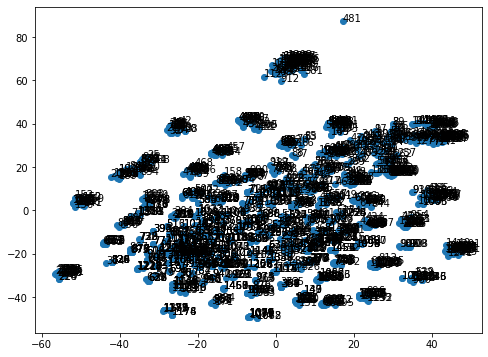

In [48]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(8, 6))
ax.scatter(lsa_embeddings_2[:, 0], lsa_embeddings_2[:, 1])

for i, w in enumerate(dct):
    ax.annotate(w, (lsa_embeddings_2[i, 0], lsa_embeddings_2[i, 1]), 
                clip_on=True)
ax.set_xlim([])
ax.set_ylim([])
plt.show()